## Exercise 2 - **Reaction-Diffusion**

The goal of this exercise is to couple physical processes implementing:
- 1D reaction-diffusion
- Non-dimensional numbers

The goal of this exercise is to combine reaction and diffusion processes acting on the concentration of a quantity $C$. The reaction equation is an ODE, as the evolution of the quantity $C$ does not depend on the neighbouring values (or spatial gradients). Consider the following reaction ODE

$$ \frac{∂C}{∂t} = -\frac{(C-C_\mathrm{eq})}{ξ}~,$$

where $C_\mathrm{eq}$ is the equilibrium concentration and $ξ$ the reaction rate.

From what you learned in class, write an reaction-diffusion code having following physical input parameters:

```
# Physics
lx   = 20.0  # domain length
dc   = 0.1   # diffusion coefficient
ξ    = 10.0  # reaction rate
Ceq  = 0.4   # equilibrium concentration
ttot = 20.0  # total simulation time
```

Discretise your domain in 200 finite-difference cells such that the first cell centre is located at `dx/2` and the last cell centre at `lx-dx/2`. Use following explicit time step limiters:

```julia
dt   = dx^2/dc/2
```

As initial condition, define a Gaussian profile of concentration `C` of amplitude and standard deviation equal to 1, located at `lx/4`.

Update all entries of the array for the reaction process (ODE) but only inner points for the diffusion process (PDE), thus leading to the fact that boundary points will only be affected by reaction and not diffusion.

> 💡 hint: Don't forget to initialise (pre-allocate) all arrays (vectors) needed in the calculations.

### Question 1

Report the initial and final distribution of concentration on a figure with axis-label, title, and plotted line labels. Also, report on the figure (as text in one label of your choice) the maximal final concentration value and its $x$ location.

### Question 2

Repeat the exercise but introduce the non-dimensional [Damköhler number](https://en.wikipedia.org/wiki/Damköhler_numbers) $Da = lx^2/dc/ξ$ as physical quantity defining the diffusion coefficient `dc` as a `# Derived physics` quantity. Confirm the if $Da < 0.1$ most of the mass diffuses away from $C_{eq}$, and the opposite holds for $Da > 1000$.

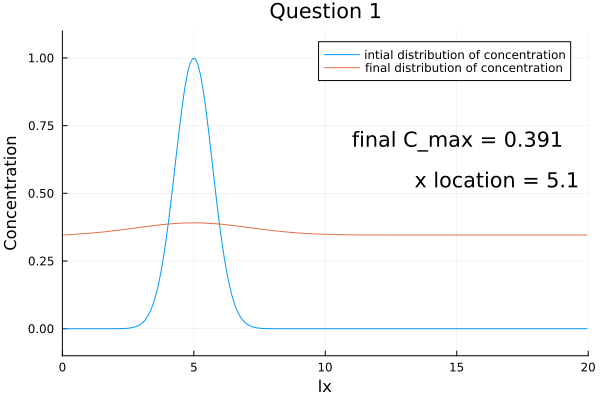

In [6]:
using Plots

function reaction_diffusion()
#physics
    lx   = 20.0 #domain length
    dc   = 0.1  #diffusion coefficient
    ξ    = 10.0 #reaction rate
    Ceq  = 0.4  #equilibrium concentration 
    ttot = 20.0 #total simulation time

#numerics
    nx   = 200 #number of grid cells to discretise the computational domain

#derived numerics
    dx   = lx / nx
    xc   = LinRange(dx / 2, lx - dx / 2, nx) #Linrange(coordinate of first point, last point, discretisation)
    dt   = dx^2/dc/2


    location  = lx/4 
    stddev    = 1
    amplitude = 1 #1/stddev*sqrt(2*pi)

#array initialisation

    C    = @. amplitude * exp(-*((xc - location / stddev)^2))
    C_i  = copy(C)
    qx   = zeros(nx-1)

#time loop
    nt   = ttot/dt

    for it in 1:nt

        qx         .= .-dc .* diff(C)  ./ dx
        C[2:end-1] .-=  dt .* diff(qx) ./ dx
        C          .-= (C .- Ceq) ./ ξ  .* dt
        

        
        #plot(xc, C_i; linewidth = 2.0, xlabel = "x" , label = "C_i", framestyle=:box)
        #plot!(xc, C ; linewidth = 2.0, xlabel="x", label="C", framestyle=:box)
    end
     C_max, index_max = findmax(C) #return max value of distribution and its index 

    plot(xc,[C_i,C];xlims=(0,lx), ylims=(-0.1,1.1), xlabel="lx", ylabel="Concentration",title="Question 1", label = ["intial distribution of concentration" "final distribution of concentration"])
    annotate!(15, 0.7, "final C_max = $(round(C_max,digits=3))")
    annotate!(16.5, 0.55, "x location = $(round(index_max*dx,digits=2))")
end

reaction_diffusion()

┌ Info: Saved animation to /home/jovyan/assignments/homework 2 - Sarangi Ganeshalingam/tmp.gif
└ @ Plots /opt/julia/packages/Plots/sxUvK/src/animation.jl:156


Plots.AnimatedGif("/home/jovyan/assignments/homework 2 - Sarangi Ganeshalingam/tmp.gif")
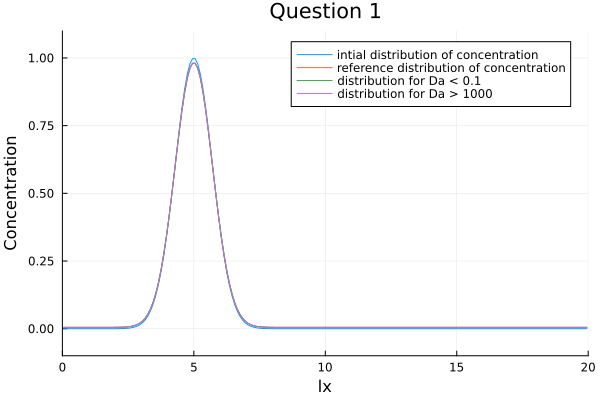

In [9]:
using Plots

function reaction_diffusion()
#physics
    lx   = 20.0 #domain length
    ξ    = 10.0 #reaction rate
    Ceq  = 0.4  #equilibrium concentration 
    ttot = 20.0 #total simulation time
    Da   = 1000
    Da1  = 0.01
    Da2  = 100000
    
    dc       = lx^2/ξ/Da
    dc_Da1   = lx^2/ξ/Da1
    dc_Da2   = lx^2/ξ/Da2
    
#numerics
    nx   = 200 #number of grid cells to discretise the computational domain

#derived numerics
    dx   = lx / nx
    xc   = LinRange(dx / 2, lx - dx / 2, nx) #Linrange(coordinate of first point, last point, discretisation)
    dt   = dx^2/dc/2


    location  = lx/4 
    stddev    = 1
    amplitude = 1 #1/stddev*sqrt(2*pi)

#array initialisation

    C    = @. amplitude * exp(-*((xc - location / stddev)^2))
    C_i  = copy(C)
    C_Da1 = copy(C)
    C_Da2 = copy(C)
    qx   = zeros(nx-1)
    qx_Da1   = copy(qx)
    qx_Da2   = copy(qx)

#time loop
    nt   = ttot/dt

    @gif for it in 1:nt

        qx             .= .-dc .* diff(C)  ./ dx
        qx_Da1         .= .-dc .* diff(C_Da1)  ./ dx
        qx_Da2         .= .-dc .* diff(C_Da2)  ./ dx
        
        C[2:end-1]     .-=  dt .* diff(qx) ./ dx
        C_Da1[2:end-1] .-=  dt .* diff(qx_Da1) ./ dx
        C_Da2[2:end-1] .-=  dt .* diff(qx_Da2) ./ dx
        
        C              .-= (C .- Ceq) ./ ξ  .* dt
        C_Da1          .-= (C_Da1 .- Ceq) ./ ξ  .* dt
        C_Da2          .-= (C_Da2 .- Ceq) ./ ξ  .* dt
        

        plot(xc,[C_i,C, C_Da1, C_Da2];xlims=(0,lx), ylims=(-0.1,1.1), xlabel="lx", ylabel="Concentration",title="Question 1", label = ["intial distribution of concentration" "reference distribution of concentration" "distribution for Da << 0.1" "distribution for Da >> 1000"])
        #plot(xc, C_i; linewidth = 2.0, xlabel = "x" , label = "C_i", framestyle=:box)
        #plot!(xc, C ; linewidth = 2.0, xlabel="x", label="C", framestyle=:box)
    end

    
 
end

reaction_diffusion()